# Stock Market Analysis

In this notebook we will be trying to analysing the Market's trend behavior. This we're going to do using the Stock Market Analysis Dataset from Kaggle - https://www.kaggle.com/datasets/thesnak/stock-market-analysis/data

Steps we're going to take:
* Problem Definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation
* All In All

## 1. Problem Definition
> Given is a Dataset about the Stock Market, can we predict how the Volumn of the Trade will be using Machine Learning?


## 2. Data

Here you can read more about the Dataset we will be using - https://www.kaggle.com/datasets/thesnak/stock-market-analysis/data


## 3. Evaluation
> If we will be reaching more then 90%, of predicting how volumn of the Trade during the proof of concept we will be pursure the project

## 4. Features

This is the information we got about the Dataset

*Data Dictonary:*
* **Ticker:** The stock ticker symbol.
* **Date:** The specific trading date.
* **Open:** Opening price of the stock for the day.
* **High:** Highest price point of the stock during the day.
* **Low:** Lowest price point during the day.
* **Close:** Closing price of the stock.
* **Adj Close:** Adjusted closing price, factoring in corporate actions like splits.
* **Volume:** Total trading volume of the stock.

### Getting our Tools ready

* We will be using:
   * The **Pandas** library - https://pandas.pydata.org/pandas-docs/stable/index.html
   * The **Matplotlib** library - https://matplotlib.org/stable/index.html
   * The **NumPy** library - https://numpy.org/doc/stable/index.html
   * The **Scikit-Learn** library - https://scikit-learn.org/stable/

In [73]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

### Load Dataset

In [74]:
df = pd.read_csv('stocks.csv')
df.shape

(248, 8)

### Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export of the dataset you're working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different type?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [75]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


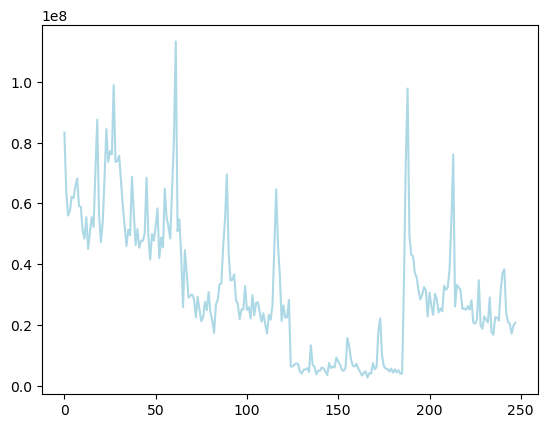

In [76]:
# Visualize some columns
df['Volume'].plot(color=['lightblue']);

In [77]:
# Get some infromatino
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [78]:
# Any missing values?
df.isna().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [79]:
# Find more out
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


### Create Subplots to Compare Close, Low, High compared to volume

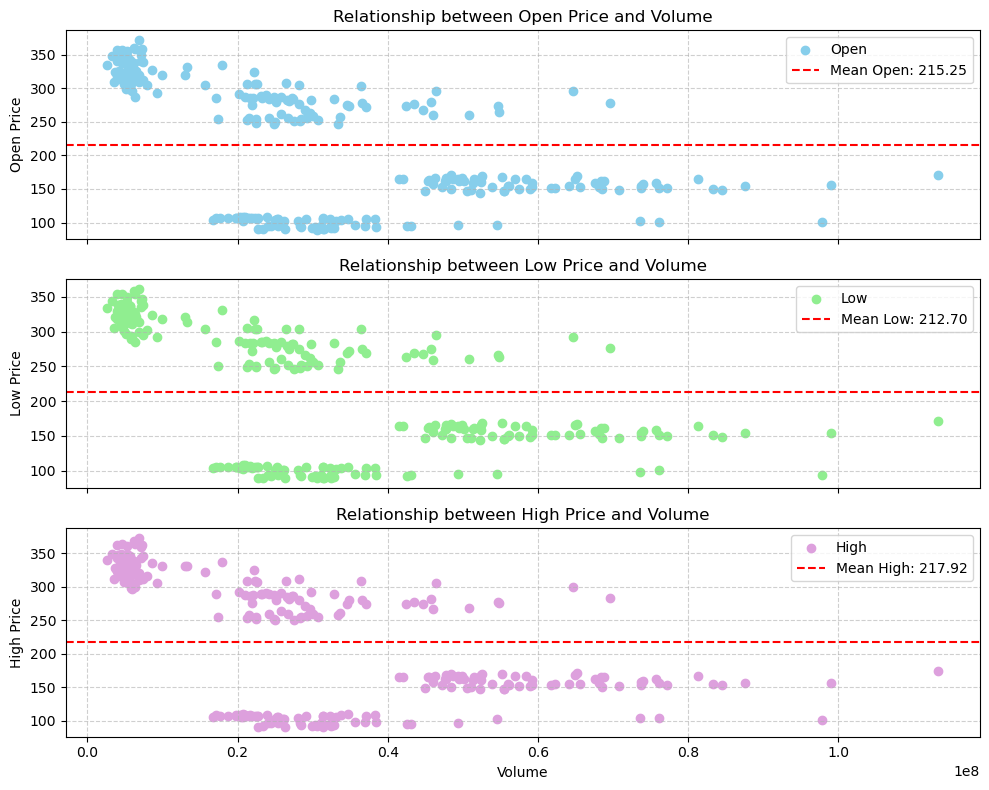

In [168]:
import matplotlib.pyplot as plt

# Create Subplots
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)

# Create plot for Open
plot0 = ax0.scatter(x=df["Volume"], y=df["Open"], color='skyblue', label="Open")
ax0.set(title="Relationship between Open Price and Volume", ylabel="Open Price")
ax0.grid(True, linestyle='--', alpha=0.6)
ax0.legend(title="Volume")
mean_open = df["Open"].mean()
ax0.axhline(y=mean_open, color='red', linestyle='--', label=f"Mean Open: {mean_open:.2f}")
ax0.legend()

# Create plot for Low
plot1 = ax1.scatter(x=df["Volume"], y=df["Low"], color='lightgreen', label="Low")
ax1.set(title="Relationship between Low Price and Volume", ylabel="Low Price")
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(title="Volume")
mean_low = df["Low"].mean()
ax1.axhline(y=mean_low, color='red', linestyle='--', label=f"Mean Low: {mean_low:.2f}")
ax1.legend()

# Create plot for High
plot2 = ax2.scatter(x=df["Volume"], y=df["High"], color='plum', label="High")
ax2.set(title="Relationship between High Price and Volume", ylabel="High Price", xlabel="Volume")
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(title="Volume")
mean_high = df["High"].mean()
ax2.axhline(y=mean_high, color='red', linestyle='--', label=f"Mean High: {mean_high:.2f}")
ax2.legend()

# Adjust the layout and view the Plot
plt.tight_layout()
plt.show()

In [81]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


**Quick Note**

We can see that the values have really similar / almost the same shape. This means, it will be hard to find pattern.

We still can see if we look closely, how to values differnces to each other.

### Create a corr Matrix

* We will try to get an overview on how to the Dataset is built. 
* Maybe we can find out more with a corr matrix

In [82]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [83]:
df.corr()

ValueError: could not convert string to float: 'AAPL'

**We got an error, because it can't convert float to string, means we need to transfrom the Dataset**

In [84]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [85]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode and Delete old column
df['Ticker Encoded'] = label_encoder.fit_transform(df['Ticker'])
df.drop('Ticker', axis=1, inplace=True)

In [86]:
df = df.reindex(columns=['Ticker Encoded', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
df.head()

,Ticker Encoded,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,0,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,0,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,0,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,0,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


### We will be dropping the Date Column

* This we will do, because the Data can't really help to improve our model
* Also it is not numerical, so we would need to convert it
* Lastly the value changes every single time - could confuse model

In [87]:
df.drop('Date', axis=1, inplace=True)
df.head()

,Ticker Encoded,Open,High,Low,Close,Adj Close,Volume
0,0,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,0,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,0,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,0,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,0,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [88]:
df.corr()

,Ticker Encoded,Open,High,Low,Close,Adj Close,Volume
Ticker Encoded,1.000000,0.837364,0.839042,0.834168,0.836014,0.836043,-0.809081
Open,0.837364,1.000000,0.999626,0.999650,0.999176,0.999173,-0.547741
High,0.839042,0.999626,1.000000,0.999654,0.999644,0.999640,-0.546175
Low,0.834168,0.999650,0.999654,1.000000,0.999663,0.999661,-0.544590
Close,0.836014,0.999176,0.999644,0.999663,1.000000,0.999999,-0.544194
Adj Close,0.836043,0.999173,0.999640,0.999661,0.999999,1.000000,-0.544370
Volume,-0.809081,-0.547741,-0.546175,-0.544590,-0.544194,-0.544370,1.000000


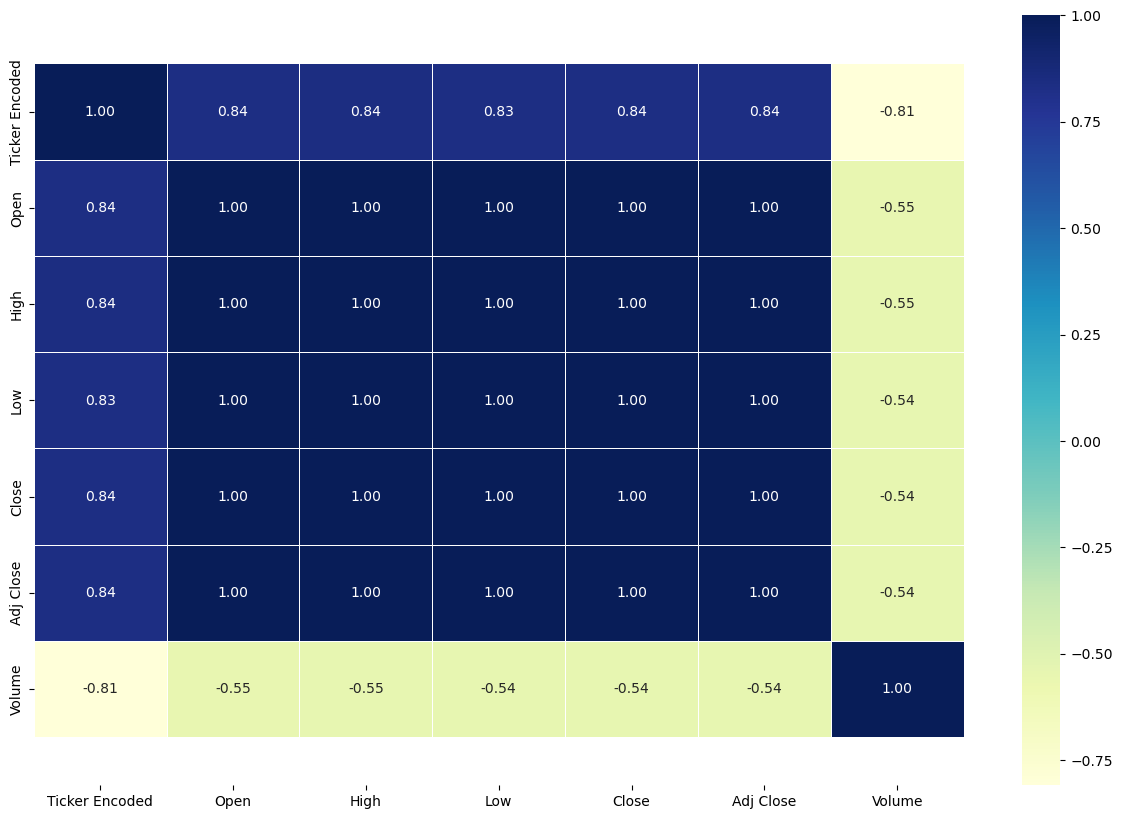

In [89]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f', # round it
                 cmap='YlGnBu')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

**Some things we can tell:**
   * The Open, High, Low, and Close prices are all very highly correlated with each other (0.83 to 1.00). This suggests that when the opening price of a stock is high, the high, low, and close prices tend to also be high, and vice versa.
   * Adjusted Close also shows a very high correlation with Open, High, Low, and Close prices. This is typical since the Adjusted Close price accounts for things like dividends and stock splits, but still largely reflects the close price movement.
   * Volume shows a negative correlation with all the other variables except Ticker Encoded, which implies that as the price increases, the volume of trades tends to decrease, and vice versa. This might suggest that higher prices deter trading volume or that significant trading volume might occur at price drops. However, the correlation with Volume is not as strong as among the price variables (around -0.54 to -0.55 with price and -0.81 with Ticker Encoded).
   * In summary, this correlation matrix tells us that the stock's opening, high, low, close, and adjusted closing prices tend to move together in a very similar pattern, which is a common characteristic of stock market data. Volume has a mild inverse relationship with these prices, which can be an area of interest for further analysis to understand market behavior.

## 5. Modelling

In [90]:
df.head()

,Ticker Encoded,Open,High,Low,Close,Adj Close,Volume
0,0,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,0,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,0,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,0,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,0,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [91]:
# Split Data into X and y
np.random.seed(42)
X = df.drop('Volume', axis=1)
y = df['Volume']

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
X_train.head()

,Ticker Encoded,Open,High,Low,Close,Adj Close
155,3,304.679993,322.779999,304.140015,320.369995,320.369995
212,1,96.570000,101.970001,95.870003,101.070000,101.070000
118,2,304.010010,308.929993,303.309998,307.260010,307.260010
196,1,91.933998,92.360001,90.870003,91.800003,91.800003
216,1,105.139999,107.510002,104.209999,104.220001,104.220001


In [93]:
y_train, len(y_train)

(155    15653300
 212    54499500
 118    36446700
 196    29891100
 216    32336900
          ...   
 106    27403400
 14     50547000
 92     34873300
 179     5618800
 102    22064800
 Name: Volume, Length: 198, dtype: int64,
 198)

Now we've got our data split into training and tst sets it's time to build a machine learning model

We'll train it (find the patterns) on the training set.

We'll test it (use the patterns) on the test set.

### SDG Regressor
* An algorithm used for regression problems Gradient Descent aims to minimize the cost function by iteratively updating the model parameters in the direction of the steepest descent of the cost function.
* This is really good, because we have many samples - so the model gets updated often
* Documentation - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [94]:
model = SGDRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-69633951763965.21

### Ridge Regressor
* We could get a pretty high score, because Ridge Regrssion is really powerful, when two variable are highly correlated with each other, which is the case here
* Here you can read more about it - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [95]:
model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8478905982472978

### Random Forest Regressor
* At its core, Random Forest is comprised of multiple decision trees. Each decision tree is trained independently on a randomly sampled subset of the training data and features.
* Here you can read more about it - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [96]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7839334482929959

**Quick Note:**
* We will continue with the Ridge Regressor, because it has the best coefficient of determination
* In the following steps we will be doing more with the defined Model

## 6. Experimentation

In the next steps we will:
1. Evaluate the Model
    * Mean Absolute Error (MAE)
    * Mean squared Error (MSE)
    * Coefficient of Determination (R2 Score)
    
2. Tuning the Hyperparameters
    * Use `GridSearchCV` to improve our Model

### 1. Evaluate the Model

The R^2 Score is: 0.78
The MSE Score is: 114995912263543.98
The MAE Score is: 7548431.66


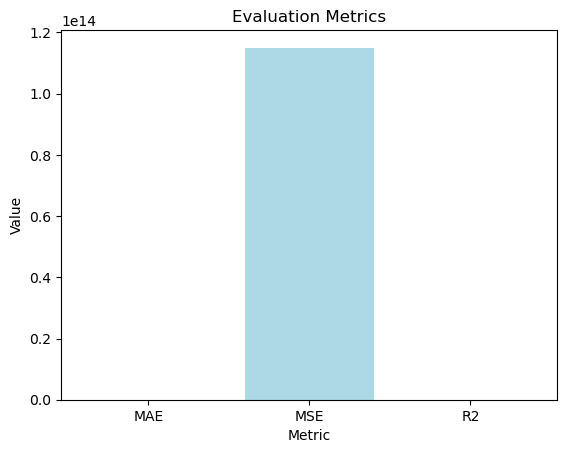

In [142]:
def evaluation(X_test, y_test):    
    # Create y preds
    y_preds = model.predict(X_test)

    # Calculating evaluation metrics
    mae = mean_absolute_error(y_test, y_preds)
    mse = mean_squared_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)

    print(f'The R^2 Score is: {r2:.2f}')
    print(f'The MSE Score is: {mse}')
    print(f'The MAE Score is: {mae}')

    # Plotting the metrics
    metrics = ['MAE', 'MSE', 'R2']
    values = [mae, mse, r2]

    # Create Subplots
    fig, ax = plt.subplots()
    ax.bar(metrics, values, color=['salmon', 'lightblue', 'darkorchid'])

    # Adding labels and title
    plt.title('Evaluation Metrics')
    plt.xlabel('Metric')
    plt.ylabel('Value')

    # Displaying the plot
    plt.show()

model_metrics = evaluation(X_test, y_test)

* Our MSE score is that high, that we can't see Our MAE or r2 Score
* This could be due to really high outstanders or something else

### 2. Tuninig Hyperparameters

Scikit Learn Documentation for Fine Tune Model - https://scikit-learn.org/stable/modules/grid_search.html

Scikit Learn Documenation for GridSearchCV Model - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [130]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [137]:
param_grid = {'n_estimators': [100, 200, 500,],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

gs_est = GridSearchCV(model, param_grid, cv=5, verbose=True)
gs_est.fit(X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/ferencburian/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/ferencburian/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/ferencburian/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/ferencburian/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/ferencburian/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/ferencburian/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=True)

In [138]:
gs_est.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

The R^2 Score is: 0.82
The MSE Score is: 87278508463800.4
The MAE Score is: 6945660.157612828


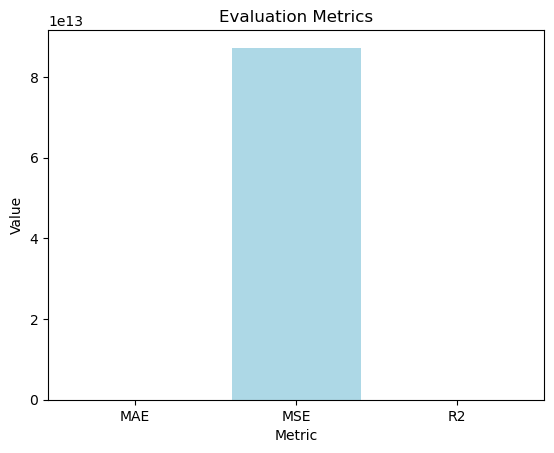

In [165]:
# Make Predictions
gs_y_preds = gs_clf.predict(X_test)

# Evaluate new Model
gs_metrics = evaluation(X_test, gs_y_preds)
gs_metrics

**Quick Note**
* We improved our Model.
* Here is a quick comparison

### 3. Comparison Matrix

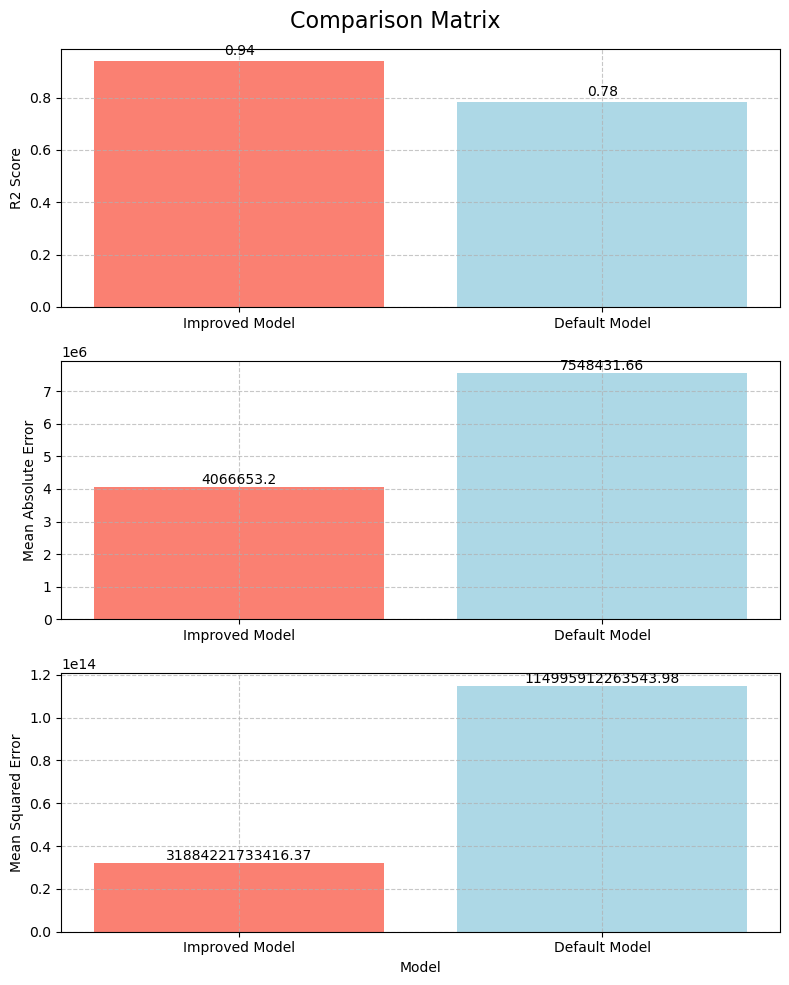

In [160]:
# Data
metrics = ['Improved Model', 'Default Model']
values1 = [r2_score(y_test, gs_y_preds), r2_score(y_test, y_preds)]
values2 = [mean_absolute_error(y_test, gs_y_preds), mean_absolute_error(y_test, y_preds)]
values3 = [mean_squared_error(y_test, gs_y_preds), mean_squared_error(y_test, y_preds)]

# Create Subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8, 10))

# Plotting the metrics
def plot_metrics(ax, values, ylabel):
    ax.bar(metrics, values, color=['salmon', 'lightblue'])
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle='--', alpha=0.7)

plot_metrics(ax1, values1, 'R2 Score')
plot_metrics(ax2, values2, 'Mean Absolute Error')
plot_metrics(ax3, values3, 'Mean Squared Error')

# Adding data labels
def add_data_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

add_data_labels(ax1, values1)
add_data_labels(ax2, values2)
add_data_labels(ax3, values3)

# Adding labels and title
fig.suptitle('Comparison Matrix', fontsize=16)
plt.xlabel('Model')

# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()

In [166]:
df.head()

,Ticker Encoded,Open,High,Low,Close,Adj Close,Volume
0,0,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,0,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,0,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,0,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,0,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


# 7. All in All

All in all we could say that our Approach was pretty successfull

We created a model, which can predict the Volume on a trade, if the Opening, High, Low, Close and Adj Close is given

Also our Model has an accuracy of 94%, which means the PoC was successfull and we can continue with this project. 

Lastly we improved our model and minimised the MSE and MAE more tham 50%. It is still really bad, but still the model is working good.

We solved the problem in this notebook and can answer the question we set in the problem with
> Yes our Model can predict the Volume of a Trade given a Dataset about the Stock market.
